In [1]:
import numpy as np
#
import qepy
from qepy.driver import Driver

In [2]:
qe_options = {
    '&control': {
        'calculation': "'scf'",
        'prefix': "'al'",
        'pseudo_dir': "'./'",
        'restart_mode': "'from_scratch'"},
    '&system': {
        'ibrav' : 0,
        'degauss': 0.005,
        'ecutwfc': 30,
        'nat': 1,
        'ntyp': 1,
        'occupations': "'smearing'"},
    'atomic_positions crystal': ['Al    0.0  0.0  0.0'],
    'atomic_species': ['Al  26.98 Al.pbe-nl-kjpaw_psl.1.0.0.UPF'],
    'k_points automatic': ['10 10 10 1 1 1'],
    'cell_parameters angstrom':[
        '0.     2.025  2.025',
        '2.025  0.     2.025',
        '2.025  2.025  0.   '],
}

!wget http://pseudopotentials.quantum-espresso.org/upf_files/Al.pbe-nl-kjpaw_psl.1.0.0.UPF

In [3]:
%%time
degs= [1E-1, 5E-2, 1E-2, 5E-3, 1E-3]
energies = []
for degauss in degs:
    qe_options['&system']['degauss'] = degauss
    #
    driver = Driver(qe_options=qe_options, logfile=True)
    ene = driver.electrons()
    print('degauss',degauss, ene)
    energies.append(ene)
    driver.stop()

degauss 0.1 -39.5162595513188
degauss 0.05 -39.50601017163104
degauss 0.01 -39.50283398045421
degauss 0.005 -39.50272673997722
degauss 0.001 -39.5026782884723
CPU times: user 8.45 s, sys: 337 ms, total: 8.79 s
Wall time: 9.17 s


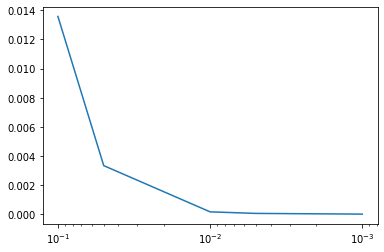

In [4]:
import matplotlib.pyplot as plt

energies=np.asarray(energies)
fig, ax = plt.subplots()
ax.plot(degs, np.abs(energies-energies[-1]))
ax.set_xscale('log')
ax.invert_xaxis()

In [5]:
qe_options['&system']['degauss'] = 0.1
driver = Driver(qe_options=qe_options, logfile=True)

In [6]:
%%time
degs= [1E-1, 5E-2, 1E-2, 5E-3, 1E-3]
energies2 = []
for degauss in degs:
    #
    qepy.klist.set_degauss(degauss)
    ene = driver.electrons()
    print('degauss',degauss, ene)
    energies2.append(ene)

degauss 0.1 -39.516259551357265
degauss 0.05 -39.50601017027766
degauss 0.01 -39.50283396899011
degauss 0.005 -39.50272674364163
degauss 0.001 -39.50267829137187
CPU times: user 2.27 s, sys: 188 ms, total: 2.46 s
Wall time: 2.46 s


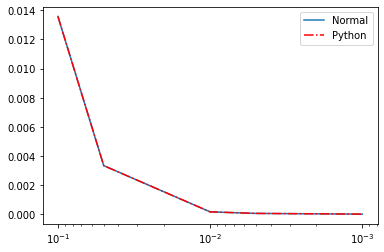

In [7]:
energies=np.asarray(energies)
energies2=np.asarray(energies2)
fig, ax = plt.subplots()
ax.plot(degs, np.abs(energies-energies[-1]), label='Normal')
ax.plot(degs, np.abs(energies2-energies2[-1]), 'r-.', label='Python')
ax.set_xscale('log')
ax.invert_xaxis()
ax.legend()

In [8]:
driver.stop()